### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Lisa Meng

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - pandas, numpy, seaborn, requests, beautifulsoup, json, pickle, pathlib, matplotlib, sqlite3, lxml, and **folium**
    
    ** Please note that Folium is not in the default Anaconda repository so it MUST be installed prior to running: conda install -c conda-forge folium. Or activating environment (environment.yml).
    
    To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/menglisa/inf510_project.git and execute this notebook.
    
    


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    My entire code (meng_lisa.py) running from remote takes awhile (~5-6 min.) to input the data into my SQL database due to Yelp's API. Yelp's API inconsistently throws a 500 Server Error (Internal Server Error), meaning there is nothing wrong with my code but with their server. Therefore, my solution was to use a while loop and try/except to catch the 500 error, use the time module to pause for 3 seconds, then try the request again. This will repeat until the request is successful or until the tenth try, where it will go on to the next request to prevent the while loop from going to infinity. 
    
    Lastly, the very last graph (scatterplot matrix) takes a bit longer to load, most likely due to the amount of graphs/data.

4.  **Anything else you feel is relevant to the grading of your project your project.**

     Please also note that when the code is run in terminal, the numpy package used for the scatterplor matrix throws a runtime warning due to NaN values in my dataframe. I am fully aware of this and of the NaN values in my dataframe; I decided to use the scatterplot matrix as a final Hail Mary to check for any possible correlations I may have missed so I silenced this warning. But this warning typically does not occur in the notebook.
      
      You may be asking why I don't simply remove the rows that have NaNs, but these rows also contain other valuable attributes that can be used for analysis (or in the case of the scatterplot matrix, to check for other correlations). Therefore these individual NaNs were accounted for in the more important analysis above the scatterplot matrix since I used Pandas for my analysis and Pandas by default excludes NaN numbers from aggregation functions.

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    The goal of my study was to find correlating factors/variables about colleges and how it affects the profitability of nearby boba/coffee/drink shops. Thus I webscraped (from 2 websites) a list of  California 4-year colleges and universities, along with attributes I thought were meaningful, such as year the college was founded, tuition costs, number of enrollment, and location (city/address). I then used the Google Maps Autocomplete API to normalize the college names and obtain its unique place ID. Using another Google Maps Geocode API, I converted the unique place ID to coordinates (latitude and longitude). With the coordinates, I used Yelp API to find nearby boba/coffee shops within a 15 mile radius and collected data about their price, rating, review count, and distance from the colleges. (Assuming the more customers a shop has, the more reviews it will also have. Thus I a decided to use review count as a varible that measures size of a shop's customer population.)
    
    I hoped to find a correlation that showed that some attribute of a college affects the pricing, quality, or amount of customers of a shop. In other words, my question is: Is the profitability of a boba/coffee shop dependent or influenced by the college it is located nearby? Because it is well-known that college studies drink a lot of coffee (to study) and enjoy studing at coffee shops (at least I do, and I love boba), my hypothesis was: If boba/coffee shops are located close to a college, then they will have higher profitability due to the student population willing to spend more (tuition), more loyal customer base (year founded, equating to how long the school has been established), larger student population (numnber of enrollment), or proximity to school which allows better access to customers (distance from college).

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    Hypothesis: If boba/coffee shops are located close to a college, then they will have higher profitability due to the student population willing to spend more (tuition), more loyal customer base (year founded, equating to how long the school has been established), larger student population (number of enrollment), or proximity to school which allows better access to customers (distance from college). 
    
    Initially, I wanted to see the location of each college and shop on a map. So I made a dot map of California with a circle around each college representing a 15 mile radius, but it was hectic-looking and did not provide a lot of information. Then, I decided to make a heat map. When zoomed it, not only was it more aesthetic pleasing, but you are able to identify specific hotspots and view which colleges had a higher density of boba shops compared to others. 
    
    Since I am testing one college variable and one boba/coffee shop at a time, I performed a correlation study. And because my independent variables (college attributes) and dependent variables (shop attributes) are continuous, I decided to use line graphs and scatter plots as my visualizations to check for correlation, and used the Pearson method to determine the $R^2$ value to test for correlation
    
    To test for correlation, I graphed the year which the colleges were founded vs. the average number of customer reviews, college tuition vs. average prices, college enrollment vs. average prices, college tuition vs. average rating, college enrollment vs. average rating, college tuition vs. average number of customer reviews, college enrollment vs. average number of customer reviews, and finally distance from college vs. average number of customer reviews, which ALL showed no dependency (according to the graph and $R^2$ values). 
    
    Thus as a Hail Mary, I decided to use a scatterplot matrix so I can visually see all at once the multiple variables and check if I missed any possible correlations between them. But unfortunately, the scatterplot matrix further suggested no correlation. 
    
    Ultimitely, my findings suggest that college attributes, such as tuition (student population willing to spend more), year founded (equating to how long the school has been established in order to develop a more loyal customer base), number of enrollment (larger student population), or distance from college (proximity to school which allows better access to customers) did not affect or influence profitability of nearyby boba/coffee shops, which was measure with price, rating, and review count. Therefore, my project validated the null hypothesis, that there is no correlation (or effect) between colleges and profitability of near by shops. 

7. **What difficulties did you have in completing the project?**  

    What is that saying? "Scientists and engineers spend more than 60% of their time just preparing the data for model input or data-model comparison" - NASA
    
    And that was my largest hurdle. Due to the process of how I collected my data, I had to data clean and pre-process along the way to remove redundancies. For instance, after webscraping, because I webscraped from 2 websites, there were duplicate colleges, so I had to remove the duplicates. Then I input this data into a Google Maps API to normalize name and obtain a unique place ID. Here, I would again clean any duplicates and remove colleges that did not have a place ID because I would not be able to aquire coordinate data. I then input this data into another Google Maps API to finally get coordinates which was used with the Yelp API to collect boba/coffee shop data. And finally, clean and pre-process the total collected data. 
    
    I struggled the most with determining how to store my data model: Pickle was the simpliest, CSV was also simple and visually showed a data, and SQL (Oh, the love and hate relationship I have with SQL). Ultimately, I decided to use SQL because it is better and faster in handling larger amounts of data (which is useful to learn for the future although I am technically not using an form of big data at the moment) and shines when it comes to relational data modelling, which I had with college data and boba shop data. I believe SQL holds its value in performing queries. So I thought it was a nice add for other users that my data model was a SQL database because the tables can be visually seen and they can perform queries. But due to SQL's rigidity, it was difficult to input my data. And in hindsight, since I used Pandas for my analysis and visualizations, I unfortunately didn't use SQL in this final part of my project. 
    
    In terms of visualizations, everything worked as planned even though it did take a while to learn. I mainly stumbled on which graphs to use and how to make them more aesthetically pleasing as my graphs tend to have a lot of data points.  
    
    Another obstacle was understand how to create an environment.yml file as working from the terminal is unfamiliar for me.

8. **What skills did you wish you had while you were doing the project?**

    To be honest, I wish I knew more statistics or ways to play around with my data (similar to what is taught in INF 549). I know that because both my independent and dependent variables are continuous, I would be using correlation or linear regression to test my hypothesis/data. But I think it would have been interesting and extremely useful for me to know other statistical tests to try out and better understand what my analysis means to see if there are other ways to manipulate my data. 
    
    I also wish I new more visualizations, both in terms of concept and coding. Again, because my independent and dependent variables are continuous, I only used line graphs and scatter plots. With more knowledge of statistics and types of graphs AND more knowledge on how to code them, I think I would be able to make more interesting and visually pleasing visualizations. 


9. **What would you do “next” to expand or augment the project?**

    I would probably add as much as I would refine. In terms of addition, to augment this project, I would probably collect data on all boba/coffee shops in california instead of those just in a 15 miles radius. Maybe a 15 miles radius is too small to see if its a determining factor that would influence profitability of a store. (I chose 15 miles because I figured that is a reasonable distance a college student would drive to get boba or coffee). But more importantly, I would try to collect BETTER data. I believe that the range of the prices I collected were to small (1-4). It would be more beneficial if I was able to collect actual currency amount so I would have a larger, more accurate range. Also, I would try to find a better resource about colleges so I can collect more attribute data, and hopefully they would have less missing values. 
    
    If I had the skills I mentioned in question 8, I would enhance my visualizations (make it more interactive - at this moment, with the maps, when you click on the college marker, there is a popup that tells you which college it is). Although it may sound very similar to Yelp, to expand this further, I would make it into either a website or app for colleges so students can find the best places for boba or coffee and find the best places to study outside of school.

In [1]:
import pandas as pd
import sqlite3

# obtain df
from src import sql_tables

# data visualization
import folium # need to "conda install -c conda-forge folium"
from folium import plugins
from folium.plugins import HeatMap
from src import maps #module

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

src.sql_tables was imported as a module!
src.maps was imported as a module!


In [2]:
# read sql db as pandas df and show tables
conn = sqlite3.connect("./data/total_data.db")
cur = conn.cursor()

colleges_df = pd.read_sql_query("SELECT * from Colleges", conn)
colleges_df

college_id                                     normalize_name  city_id  \
0             1  Academy for Jewish Religion, California, Hilga...        1   
1             2  Academy of Art University, New Montgomery Stre...        2   
2             3  Academy of Chinese Culture and Health Sciences...        3   
3             4  Acupuncture & Integrative Medicine College, Sh...        4   
4             5  Alliant International University, Los Angeles,...        5   
5             6  American Baptist Seminary of the West, Dwight ...        4   
6             7  American College of Traditional Chinese Medici...        2   
7             8  American Conservatory Theater, Geary Street, S...        2   
8             9  American Film Institute, North Western Avenue,...        1   
9            10  American Heritage University of Southern Calif...        6   
10           11  American Jewish University, Mulholland Drive, ...        1   
11           12  American University of Health Sciences, East H...        7   
12           13  Angeles College - A School of Medical Careers ...        1   
13           14  Antioch University Santa Barbara, Anacapa Stre...        8   
14           15  Antioch University, Corporate Pointe, Culver C...        9   
15           16  Argosy University, Inland Empire, North Centre...        6   
16           17  Art Center College of Design Student Store, Li...       10   
17           18  ArtCenter College of Design, Lida Street, Pasa...       10   
18           19  Ashford University, Spectrum Center Boulevard,...        5   
19           20  Azusa Pacific University College, West Citrus ...       11   
20           21  Azusa Pacific University, East Alosta Avenue, ...       12   
21           22  Berean Bible College, Twin Peaks Road, Poway, ...       13   
22           23  Bergin University of Canine Studies, Old Redwo...       14   
23           24  Bethel Seminary San Diego, Arosa Street, San D...        5   
24           25  Bethesda University, North Euclid Street, Anah...       15   
25           26  Biola University, Biola Avenue, La Mirada, CA,...       16   
26           27  Brandman University, Laguna Canyon Road, Irvin...       17   
27           28  Bristol University, East Orangewood Avenue, An...       15   
28           29  Brooks Institute of Higher Learning, Universit...       18   
29           30           CALMAT, Sonora Court, Sunnyvale, CA, USA       19   
..          ...                                                ...      ...   
237         238  University of Phoenix, North Euclid Avenue, Pa...       27   
238         239  University of Phoenix, River Park Place West, ...      106   
239         240  University of Redlands Marin Campus, Seminary ...      107   
240         241  University of Redlands, East Colton Avenue, Re...      108   
241         242  University of San Diego, Alcala Park, San Dieg...        5   
242         243  University of San Francisco - Orange County Ca...        2   
243         244  University of Southern California, Los Angeles...        1   
244         245  University of St. Augustine for Health Science...       35   
245         246  University of West Los Angeles, South La Ciene...      109   
246         247  University of the Pacific, Pacific Avenue, Sto...       57   
247         248  University of the People, East Colorado Boulev...       10   
248         249  University of the West, Walnut Grove Avenue, R...      110   
249         250  Vanguard University, Fair Drive, Costa Mesa, C...       27   
250         251  West Coast University - Los Angeles Campus, Vi...      111   
251         252  West Coast University - Ontario Campus, East G...        6   
252         253  West Coast University, West La Palma Avenue, A...       15   
253         254  Westcliff University, Von Karman Avenue, Irvin...       17   
254         255  Western Seminary Sacramento Campus, Technology...       42   
255         256  Western Seminary San Jose Campus, Sout

In [3]:
cities_df = pd.read_sql_query("SELECT * from Cities", conn)
cities_df

city_id        city_name
0          1      Los Angeles
1          2    San Francisco
2          3          Oakland
3          4         Berkeley
4          5        San Diego
5          6          Ontario
6          7      Signal Hill
7          8    Santa Barbara
8          9      Culver City
9         10         Pasadena
10        11         Glendora
11        12            Azusa
12        13            Poway
13        14     Rohnert Park
14        15          Anaheim
15        16        La Mirada
16        17           Irvine
17        18          Ventura
18        19         San Jose
19        20        Riverside
20        21           Fresno
21        22           Clovis
22        23         Valencia
23        24    Thousand Oaks
24        25  San Luis Obispo
25        26        Sunnyvale
26        27       Costa Mesa
27        28           Pomona
28        29        Camarillo
29        30            Chico
..       ...              ...
84        85      Santa Maria
85        86      Santa Clara
86        87          Redding
87        88      Aliso Viejo
88        89         El Cajon
89        90         Whittier
90        91         Stanford
91        92       St. Helena
92        93      Santa Paula
93        94     Los Alamitos
94        95          Cypress
95        96        Santa Ana
96        97         Murrieta
97        98        Lancaster
98        99            Davis
99       100           Merced
100      101         La Verne
101      102       Costa Mesa
102      103       Sacramento
103      104        San Diego
104      105         San Jose
105      106           Fresno
106      107      San Anselmo
107      108         Redlands
108      109        Inglewood
109      110         Rosemead
110      111  North Hollywood
111      112        Montecito
112      113          Rocklin
113      114          Burbank

[114 rows x 2 columns]

In [4]:
shops_df = pd.read_sql_query("SELECT * from Shops", conn)
shops_df

shop_name   latitude   longitude  shop_id
0                            1 Oz Coffee  37.404570 -121.982200        1
1              10 Speed Coffee-Calabasas  34.157382 -118.638654        2
2                       11th Hour Coffee  36.975930 -122.028970        3
3                                 15 Tea  36.852503 -119.791915        4
4               1541 Pastries and Coffee  30.596019  -96.299041        5
5                          1920 Tea Club  36.823201 -119.806794        6
6                       1951 Coffee Shop  37.866629 -122.260679        7
7                             2GO Salads  32.693550 -115.495480        8
8                        3 Blossoms Cafe  33.745257 -117.946393        9
9                        360 Health Café  36.665614 -121.811412       10
10                       55 Thai Kitchen  32.715640 -117.137950       11
11                       5th Ave Bagelry  33.816265 -118.026908       12
12                       5th Ave Bagelry  33.863344 -117.543019       13
13                         7 Leaves Cafe  33.673577 -117.918769       14
14                         7 Leaves Cafe  33.687642 -117.771227       15
15                         7 Leaves Cafe  33.740754 -117.820775       16
16                         7 Leaves Cafe  33.767250 -117.938005       17
17                         7 Leaves Cafe  33.830380 -118.029000       18
18                         7 Leaves Cafe  33.872784 -118.072899       19
19                         7 Leaves Cafe  34.000536 -117.730264       20
20                         7 Leaves Cafe  34.096550 -118.128250       21
21                         7 Leaves Cafe  37.375103 -121.872480       22
22                              7-Eleven  32.665947 -115.496622       23
23                              7-Eleven  32.676000 -115.498330       24
24                              7-Eleven  34.191416 -117.359985       25
25                              7-Eleven  34.405229 -119.529678       26
26                              7-Eleven  37.318828 -120.468383       27
27                              7-Eleven  37.323805 -120.487406       28
28                              7-Eleven  37.515839 -120.848398       29
29                              7-Eleven  37.521578 -120.888189       30
...                                  ...        ...         ...      ...
2022                         Yumi Yogurt  37.323810 -121.968490     2023
2023                      Yummi Tea Cafe  37.414925 -121.875899     2024
2024             Yureka Boba & Tea House  34.133860 -117.903480     2025
2025               Zama Tea and Kombucha  33.741459 -117.824114     2026
2026                        Zaranda Café  19.042666  -98.194881     2027
2027                        Zero Degrees  33.744400 -117.957550     2028
2028                        Zero Degrees  34.063762 -117.260633     2029
2029                        Zero Express  33.874345 -117.890335     2030
2030                              Zero X  33.975990 -117.352330     2031
2031                              Zero X  34.048446 -117.810912     2032
2032                 Zizzo's Coffeehouse  34.426330 -119.868830     2033
2033                       Zombee Donuts  33.873780 -117.911710     2034
2034                 ZombieRunner Coffee  37.426115 -122.144789     2035
2035                          Zooza Cafe  34.165178 -118.828336     2036
2036                 Zumbar Coffee & Tea  32.902003 -117.225558     2037
2037                          Zweet Cafe  34.129740 -118.216450     2038
2038                      aDosage Coffee  34.128535 -117.887646     2039
2039                          bobaTEAque  33.820585 -117.836162     2040
2040                               i-Tea  37.432740 -121.892770     2041
2041                               i-Tea  37.695911 -122.072915     2042
2042                               i-Tea  37.722769 -122.154214     2043
2043                               i-Tea  37.800614 -122.270677     2044
2044                               i-Tea  37.835349 -122.126471     2045
2045            

In [5]:
boba_near_colleges_df = pd.read_sql_query("SELECT * from Boba_near_Colleges", conn)
boba_near_colleges_df

college_id  shop_id  review_count  rating   latitude   longitude  price  \
0              1      107        1616.0     4.0  34.040650 -118.443595    1.0   
1              1      138         899.0     4.5  34.038112 -118.441865    2.0   
2              1     1830        5801.0     4.0  34.097807 -118.362255    2.0   
3              1     1950        2472.0     4.0  34.062640 -118.399430    2.0   
4              1     1774        2819.0     3.5  34.040740 -118.427860    2.0   
5              1     1542         785.0     4.0  34.062452 -118.446849    1.0   
6              1       98         623.0     4.5  34.039960 -118.429510    2.0   
7              1     1494        1831.0     4.5  34.021412 -118.495980    2.0   
8              1     1326        1692.0     4.5  34.017699 -118.493718    1.0   
9              1     1506         432.0     4.0  34.062201 -118.447867    1.0   
10             1      494         848.0     4.0  34.039477 -118.442894    2.0   
11             1     1294         396.0     4.5  34.041750 -118.459500    1.0   
12             1      166         827.0     4.0  34.039250 -118.441652    1.0   
13             1      662         854.0     3.5  34.060234 -118.444206    2.0   
14             1     1029         653.0     4.0  34.059532 -118.445623    2.0   
15             1     1949        2797.0     4.0  34.082153 -118.378935    2.0   
16             1      515        1019.0     4.5  34.020632 -118.399519    1.0   
17             1     1150        1522.0     4.5  34.062122 -118.347790    2.0   
18             1      177         939.0     4.5  34.072953 -118.375560    1.0   
19             1     1935         693.0     4.5  34.037340 -118.388920    1.0   
20             2      217        2218.0     4.0  37.782466 -122.407753    2.0   
21             2      242        1936.0     4.0  37.789943 -122.407306    1.0   
22             2     1326        1399.0     4.5  37.775664 -122.393452    1.0   
23             2     1451        2392.0     4.0  37.784177 -122.402069    2.0   
24             2      217        1517.0     4.0  37.796045 -122.393810    1.0   
25             2      681        1763.0     4.0  37.787680 -122.414339    2.0   
26             2     1714        1171.0     4.0  37.785680 -122.411483    2.0   
27             2      713         563.0     4.5  37.790010 -122.411770    1.0   
28             2     1872        1642.0     4.0  37.787412 -122.406356    3.0   
29             2     1638        1299.0     4.0  37.799180 -122.408280    1.0   
...          ...      ...           ...     ...        ...         ...    ...   
5233         266      320         975.0     4.0  33.983166 -118.459635    2.0   
5234         266      138         899.0     4.5  34.038112 -118.441865    2.0   
5235         266      107        1616.0     4.0  34.040650 -118.443595    1.0   
5236         266     1397         190.0     4.5  33.993451 -118.442109    1.0   
5237         266     1774        2819.0     3.5  34.040740 -118.427860    2.0   
5238         266     1830        5801.0     4.0  34.097807 -118.362255    2.0   
5239         266     1813         665.0     4.0  33.979448 -118.465846    1.0   
5240         266      768         458.0     4.0  34.000370 -118.470270    1.0   
5241         266      217         268.0     4.5  33.991955 -118.470306    2.0   
5242         266      728         724.0     4.5  34.019418 -118.488086    2.0   
5243         267       96        1365.0     4.0  37.871958 -122.268859    1.0   
5244         267      550         715.0     4.0  37.858654 -122.268143    2.0   
5245         267     1143         557.0     4.0  37.866177 -122.258783    2.0   
5246         267     1932         694.0     4.0  37.871821 -122.260141    1.0   
5247         267        7         215.0     4.5  37.866629 -122.260679    1.0   
5248         267      359         824.0     4.0  37.868870 -122.254770    1.0   
5249         267     2047         417.0     4.5  37.891644 -122.279387    1.0   
5250         267      731         374

In [6]:
# Dot Map
maps.dot_map(colleges_df,shops_df)
# also saved as html in data folder 

My inital thought process was plotting the colleges on a map and their nearby boba/coffee shops, with a 15 mile (~24140 meter) radius, in order to visually see the proximity/distances between the colleges and shops, and to see which colleges share the same shop, which rendered the above dot map. But as you can see, the map looks very hectic, so I then decided to use a heat map.

In [7]:
# Heat map
maps.heat_map(colleges_df,shops_df)
# also saved as html in data folder 

Although at bird-eye view, the heat map also does not seem as useful because I purposely gathered data about shops within a 15 mi radius of colleges, so it seems like EVERYTHING near the colleges are red. But the heat map is more valuable once zooomed in. Once zoomed in, you'll be able to identify more specific hotpots and notice that some colleges don't have as high density of boba shops as compared to others.

To determine if college attributes, such as year founded, number of enrollment, tuition costs, and distance from boba/coffee shops, affect profitability of those nearby shops, I will plot and use the Pearson method to test if the attributes of the shops (price, rating, and review count) are dependent upon the college attributes.

In [8]:
# Merge college and boba_near_colleges df to make graphs
df = pd.merge(colleges_df, boba_near_colleges_df, on='college_id', how='inner')

year_founded  review_count
year_founded      1.000000     -0.076662
review_count     -0.076662      1.000000

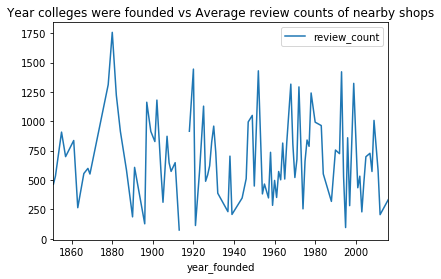

In [9]:
# find corelation between how long school has been estsblished (year_founded) and amount of customers (will test with mean review count)
ave_reviews = df[['year_founded','review_count']].groupby(by=['year_founded']).mean()
ave_reviews.plot(title='Year colleges were founded vs Average review counts of nearby shops')

# find r^2 to determine percentage of correlation/dependence between variables
ave_reviews.reset_index().corr()

As you can clearly see, there no is trend. Thus no correlation. But to be sure, using the Pearson method, $R^2$ = -0.077, which is very insignificant, implying how long a college has been established does not affect the amount a customer a shop has.

tuition     price
tuition  1.000000  0.039146
price    0.039146  1.000000

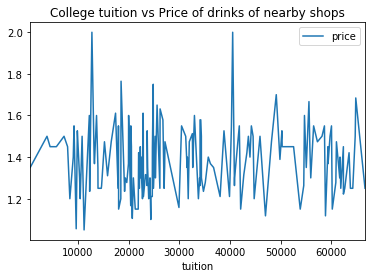

In [10]:
# determine if tuition or enrollment affect price of shops nearby
df['tuition'] = df['tuition'].replace('[\$,]','', regex=True).astype(float)
df['enrollment'] = df['enrollment'].replace(',','', regex=True).astype(float)
price_vs_tuition = df[['price','tuition']].groupby(by=['tuition']).mean()
price_vs_enrollment = df[['price','enrollment']].groupby(by=['enrollment']).mean()

price_vs_tuition.plot(title='College tuition vs Price of drinks of nearby shops')
price_vs_tuition.reset_index().corr()

Again, it is obvious there is no trend and thus no correlation. $R^2$ = 0.039, which is very insignicant, suggesting that tuition costs has no affect on price of drink at nearby shops.

enrollment    price
enrollment     1.00000 -0.15426
price         -0.15426  1.00000

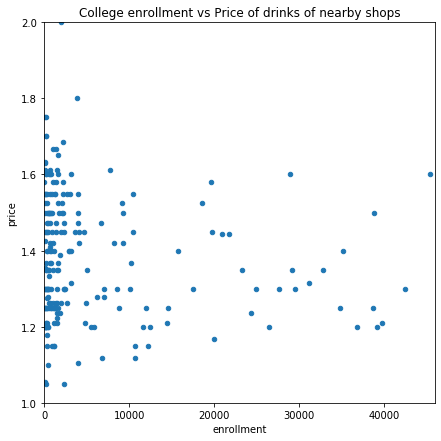

In [11]:
# for enrollment, there is an outlier of 107,170, so it will but cutoff from analysis
price_vs_enrollment.reset_index().plot(kind='scatter', 
                                        title = 'College enrollment vs Price of drinks of nearby shops',
                                        x='enrollment',y='price', 
                                        xlim = (0,46000), ylim=(1,2), figsize=(7,7))
price_vs_enrollment.reset_index().corr()

With the overall graph and $R^2$ value, it is clear there is no correlation. 

But it is also very noticable that there is a large cluster of data points for enrollment from 0-5000, which shows randomess/insignificance, so will focus on the enrollment data between 5000-9000 to check for correlation. But to make sure, here is the same graph but only showing data points for enrollment less than 5000.

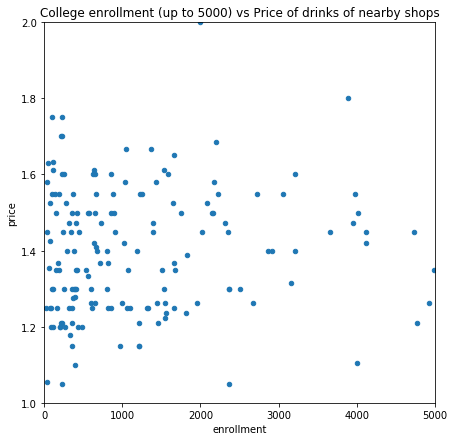

In [12]:
price_vs_enrollment.reset_index().plot(kind='scatter', 
                                        title = 'College enrollment (up to 5000) vs Price of drinks of nearby shops',
                                        x='enrollment',y='price', 
                                        xlim = (0,5000), ylim=(1,2), figsize=(7,7))

As you can see, no correlation.

And here, we will now look at the data points with enrollment between 5000-9000, also taking outliers into account.

enrollment    price
enrollment     1.00000  0.06158
price          0.06158  1.00000

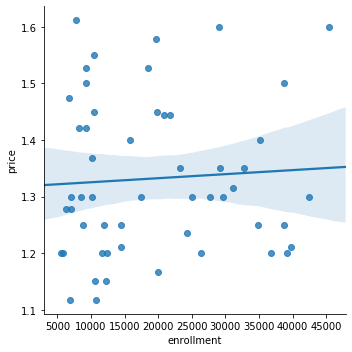

In [13]:
price_vs_enrollment = price_vs_enrollment.reset_index()
price_vs_enrollment = price_vs_enrollment[price_vs_enrollment['enrollment'] > 5000]
price_vs_enrollment = price_vs_enrollment[price_vs_enrollment['enrollment'] < 90000].groupby(by='enrollment').mean()
price_vs_enrollment.reset_index().corr()

price_vs_enrollment = price_vs_enrollment.reset_index()
sns.lmplot(x='enrollment',y='price',data=price_vs_enrollment,fit_reg=True)
price_vs_enrollment.corr()

Even when focusing on enrollment data between 5000-9000, $R^2$ = 0.062, still insignificant, which is further represented by the regression line. Therefore, it is safe to suggest that number of enrollment also does not affect price of drinks at nearby shops.

In [14]:
# determine if tuiton or enrollment affect rating of nearby shops
rating_vs_tuition = df[['rating','tuition']].groupby(by=['tuition']).mean()
rating_vs_enrollment = df[['rating','enrollment']].groupby(by=['enrollment']).mean()

tuition    rating
tuition  1.000000  0.050491
rating   0.050491  1.000000

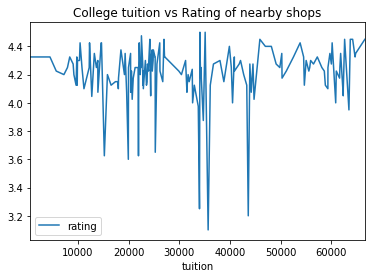

In [15]:
rating_vs_tuition.plot(title = 'College tuition vs Rating of nearby shops')
rating_vs_tuition.reset_index().corr()

When comparing tuition costs with rating of nearby shops, the above graph shows no relation and the $R^2$ value of 0.050 further suggests no correlation. Thus rating/quality of shops near by colleges are not affected by tuiton costs.

enrollment    rating
enrollment    1.000000 -0.006557
rating       -0.006557  1.000000

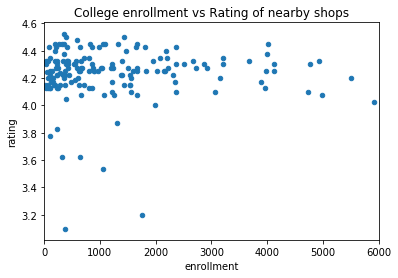

In [16]:
rating_vs_enrollment.reset_index().plot(kind='scatter', title = 'College enrollment vs Rating of nearby shops', x='enrollment', y='rating', xlim=(0,6000))
rating_vs_enrollment.reset_index().corr()

Again, with $R^2$ = -0.007, there is no correlation between college enrollment and rating of nearby shops.

Assuming the more customers a shop has, the more reviews it will also have. I am using review_count as a varible that translates to size of customer population.

In [17]:
# determine if tuiton or enrollment affect review_count of nearby shops
review_count_vs_tuition = df[['review_count','tuition']].groupby(by=['tuition']).mean()
review_count_vs_enrollment = df[['review_count','enrollment']].groupby(by=['enrollment']).mean()

tuition  review_count
tuition       1.000000     -0.069247
review_count -0.069247      1.000000

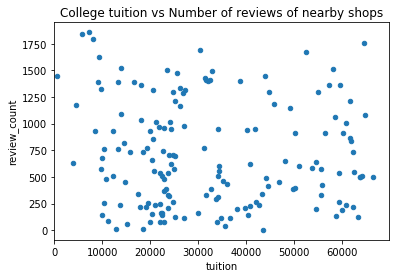

In [18]:
review_count_vs_tuition.reset_index().plot(kind='scatter', title = 'College tuition vs Number of reviews of nearby shops', x='tuition', y='review_count', xlim=(0,None))
review_count_vs_tuition.reset_index().corr()

The graph and $R^2$ value of -0.069 suggest no correlation between college tuition and review count. In other words, tuition costs of nearby colleges does not affect the amount of reviews, therefore does not affect the customer base of shops. 

enrollment  review_count
enrollment      1.000000      0.004077
review_count    0.004077      1.000000

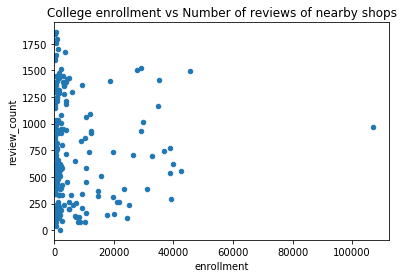

In [19]:
review_count_vs_enrollment.reset_index().plot(kind='scatter', title = 'College enrollment vs Number of reviews of nearby shops', x='enrollment', y='review_count', xlim=(0,None))
review_count_vs_enrollment.reset_index().corr()

It is very clear from the graph above and $R^2$ value that there is no correlation between college enrollment and reivew count. Hence, suggesting that a shops customer base is not dependent on number of enrollment at a nearby college.

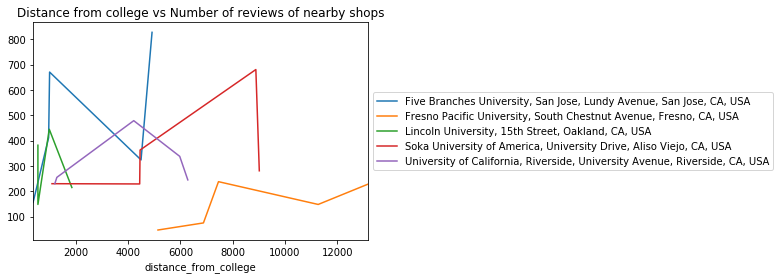

In [23]:
# determine if distance from college affects amount of customers for shop
''' Because this graph plots the distances between colleges and each shop within a 15 mi radius, 
    it will generate too many lines on the graph, making it incomprehendable. Thus I will randomly
    choose 5 colleges and 5 shops near though colleges. But if you would like to see the code that 
    plots all the schools and shops, here it is below:

    review_count_vs_distance = df[['normalize_name','review_count','distance_from_college']].dropna().set_index('normalize_name')
    review_count_vs_distance = review_count_vs_distance.sort_values(by = 'distance_from_college')

    fig, ax = plt.subplots()
    for name, group in review_count_vs_distance.groupby('normalize_name'):
        group.plot('distance_from_college', y='review_count', ax=ax, label=name, xlim=(0,15000), ylim=(0,None))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    '''
review_count_vs_distance = df[['normalize_name','review_count','distance_from_college']].dropna().set_index('normalize_name')

# shuffle df
review_count_vs_distance = review_count_vs_distance.sample(frac=1)

# randomly choose 5 shops from 5 colleges
sample_df = pd.concat(
    [g.head(5) for rows, g in review_count_vs_distance.groupby(['normalize_name'], sort=False)][:5])

# sort values to make distance ascending to make line graph, then grouby 
sample_df = sample_df.sort_values(['normalize_name', 'distance_from_college']).groupby('normalize_name')

fig, ax = plt.subplots()
for name, group in sample_df:
    group.plot('distance_from_college', title = 'Distance from college vs Number of reviews of nearby shops', y='review_count', ax=ax, label=name)

# move legend to outside of graph   
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('review_count_vs_distance_linegraph.png')
plt.show()

From the line graph, it is clear that there is no significant correlation. Therefore, distance from college does not play a factor in amount a reviews (or customers) a shop has.

After all these graphs and analysis, I am confident to suggest that the attributes of a boba/coffee shop (rating, price, amount of customers(review count)) are not significantly correlated or dependent on the attributes of colleges (year founded, tuition, enrillment, or distance from shops). But as a final crap-shot or Hail Mary, I would like to see a scatterplot matrix to see if there are ANY possible correlations that I may have missed.

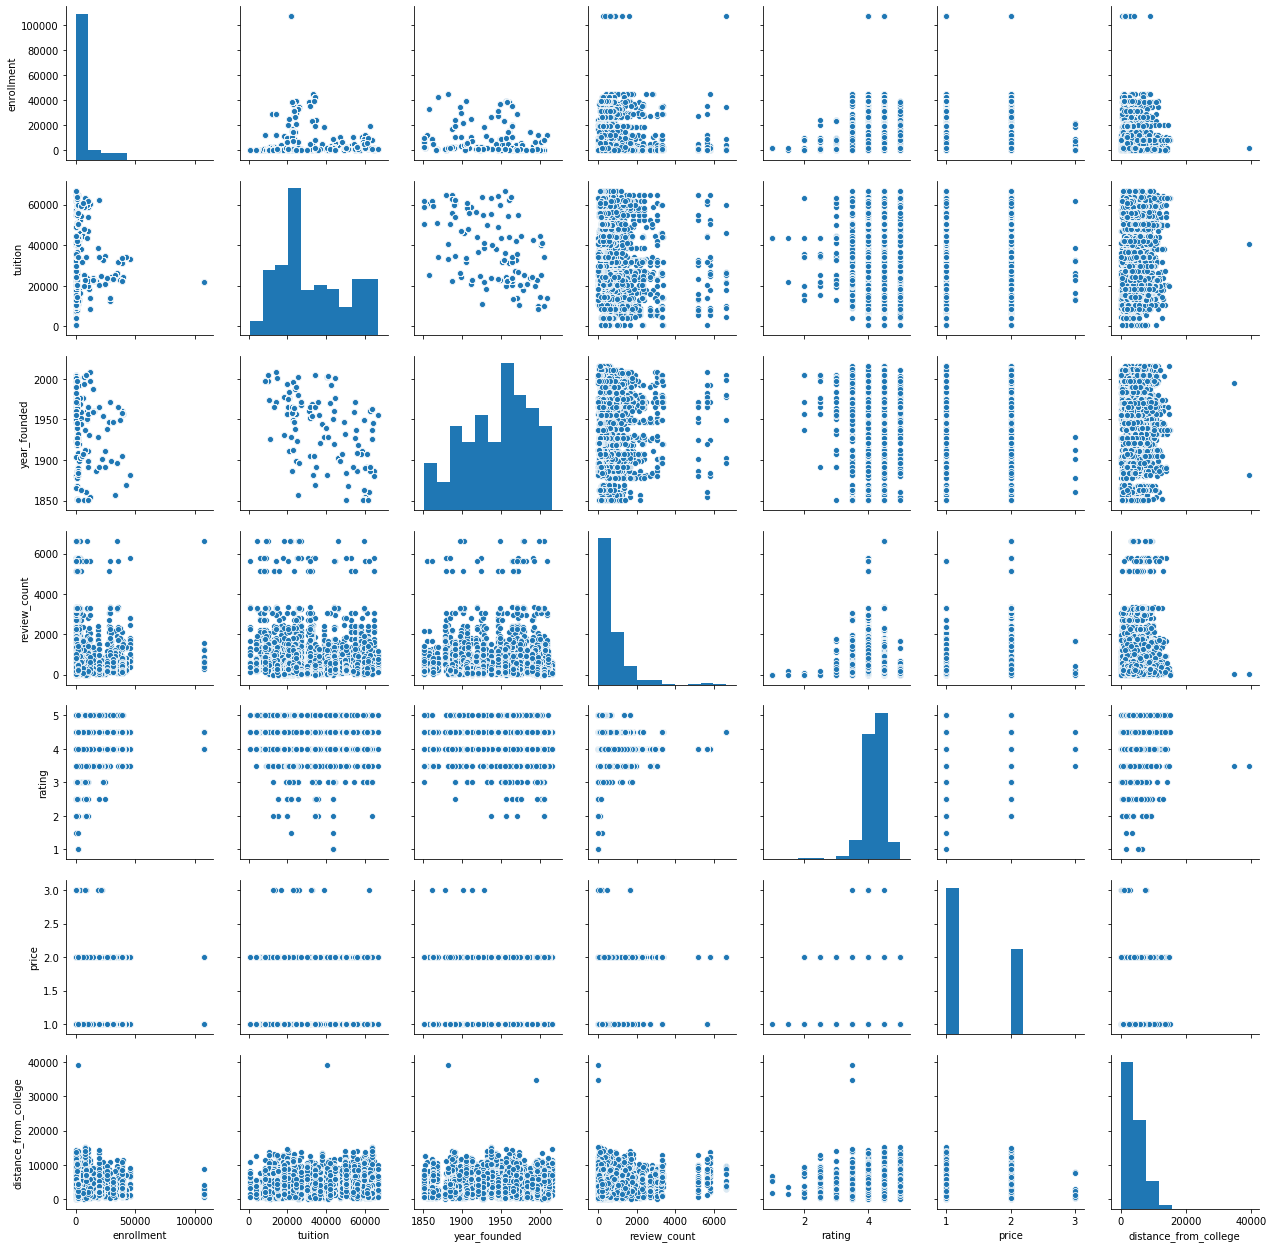

In [21]:
total_df = pd.merge(df, cities_df, on='city_id', how='inner')
total_df = pd.merge(total_df, shops_df, on='shop_id', how='inner').drop(columns=['college_id','city_id','shop_id','place_id','url','latitude','longitude','latitude_x','longitude_x', 'latitude_y','longitude_y'])
   
'''I am aware that my total_df has NaNs, but out of curiousity and as a final Hail Mary, 
I would like to see what the scatterplot matrix looks like to view the multiple variables all at once 
and see if there is a correlatoin. Therefore I will silent this runtime warning.
'''
np.warnings.filterwarnings('ignore')    

sns.pairplot(total_df, kind="scatter")
#save the map as an html
plt.savefig('scatterplot_matrix.png')
plt.show()

Sadly and unfortunately, the scatterplot matrix seems nonsensical and does not show any relevant correlations. Therefore, I will conclude that the profitability of boba/coffee shops is not dependent on nearby colleges.